## 1


a)


$$\int_{0}^{L} dx \sin(\frac{\pi m x}{L})\hat{H} \Psi(x)= \int_{0}^{L} dx \sin(\frac{\pi m x}{L})E \sum_{n=1}^{\infty}\psi_n \sin(\frac{\pi n x}{L}))$$ $$=E \sum_{n=1}^{\infty} \psi_n \int_{0}^{L}dx \sin(\frac{\pi m x}{L})\sin(\frac{\pi n x}{L})=\frac{L}{2}E\sum_{n=1}^{\infty}\delta_{mn}\psi_n=\frac{L}{2}E\psi_m$$

 


Defining the i-th wave function as: $\phi_i=\sin(\frac{i \pi x}{L})$
then,
$$\Psi(x)=\sum_{i=1}^{\infty}\psi_i \phi_i$$
$$\langle \phi_i| \hat{H} |\Psi \rangle = \sum_j \langle \phi_i| \hat{H} |\phi_j \rangle  \psi_j =\frac{L}{2} E \psi_i$$ Then,

$$\sum_j \frac{2}{L}\langle \phi_i| \hat{H} |\phi_j \rangle \psi_{j}=E  \psi_i$$

where:
$$H_{ij}=\frac{2}{L}\langle \phi_i| \hat{H} |\phi_j \rangle =  \frac{2}{L}\biggl[\frac{-\hbar^2}{2M}\langle \phi_i|\frac{d^2}{dx^2}|\phi_j \rangle + \langle\phi_i|V(x)|\phi_j\rangle \biggl]$$
$\langle \phi_i|\frac{d^2}{dx^2}|\phi_j \rangle=\langle sin(\frac{i\pi x}{L})|\frac{d^2(sin(\frac{j \pi x}{L}))}{dx^2}\rangle=\frac{j^2\pi^2}{L^2}\frac{L}{2}\delta_{ij}$
$$=  \frac{\hbar^2 j^2 \pi^2}{ 2ML^2 } \delta_{ij} +  \frac{2}{L}\langle\phi_i|V(x)|\phi_j\rangle$$

I have skipped the integral steps to make it look cleaner.

which is equivalent to:
$$\textbf{H}{\psi}=E\psi$$

b)

changing the indices to book convention, because, i might cause confusion:
$H_{mn}=\frac{2}{L^3} \frac{L\hbar^2 m^2 \pi^2}{4 M } \delta_{mn} +  \frac{2a}{L^2}(\delta_{mn}\frac{L^2}{4} - C_{mn}(\frac{2L}{\pi})^2\frac{mn}{(m^2-n^2)^2}) ;C_{mn}=1 m \neq n; m,n \in 2i+1, 2j,  \text{ else}  0 $

$$H_{mn}=( \frac{\hbar^2 m^2 \pi^2}{ 2L^2M } + \frac{a}{2}) \delta_{mn} -   C_{mn}(\frac{8a}{\pi^2}\frac{mn}{(m^2-n^2)^2})$$

There is no complex argument in the expression,  the diagonal elements are returned by $\delta_{mn}$, while off diagonal elements are connected with $C_{mn}$. Since the denominator term $(m^2-n^2)^2$ is squared, that means the permutations of $mn$ and  $nm$ are equivalent. Rest of the elements are zero. Thus, the matrix is symmetric.

In [139]:

from scipy import constants,integrate
import numpy as np
from pylab import plot,xlabel,ylabel,legend,xlim,ylim,grid

In [186]:
def H(m,n):
    a=10*constants.e
    L=5e-10
    if m==n:
        return(((constants.hbar*constants.hbar*m*m*np.pi*np.pi)/(2*L*L*constants.m_e))+(a/2))
    if m!=n:
        if (m%2==0 and n%2==0):
            return(0)
        if m%2==0 or n%2==0:
            return((-a*8*m*n)/(np.pi*((m*m)-(n*n)))**2)
        else:
            return(0)
    

c)

In [194]:
N=10
A=np.zeros([N,N])
for i in range(len(A)):
    for j in range(len(A)):
        
        A[i][j]=H(i+1,j+1)
E2=np.linalg.eigvalsh(A)/constants.e        
print('Energies(eV):',E2)


Energies(eV): [  5.8363769   11.18109291  18.66289158  29.14419776  42.65507485
  59.18525782  78.72936019 101.28548383 126.85138575 155.55532885]


d)

In [195]:
N=100
A=np.zeros([N,N],float)
for i in range(len(A)):
    for j in range(len(A)):
        
        A[i][j]=H(i+1,j+1)
E1=np.linalg.eigvalsh(A)/constants.e
print('Energies(eV):',E1)


Energies(eV): [5.83637650e+00 1.11810916e+01 1.86628897e+01 2.91441890e+01
 4.26550657e+01 5.91852052e+01 7.87293084e+01 1.01284853e+02
 1.26850553e+02 1.55425706e+02 1.87009902e+02 2.21602891e+02
 2.59204512e+02 2.99814660e+02 3.43433261e+02 3.90060265e+02
 4.39695636e+02 4.92339346e+02 5.47991375e+02 6.06651710e+02
 6.68320337e+02 7.32997248e+02 8.00682435e+02 8.71375893e+02
 9.45077617e+02 1.02178760e+03 1.10150585e+03 1.18423235e+03
 1.26996711e+03 1.35871012e+03 1.45046138e+03 1.54522090e+03
 1.64298866e+03 1.74376467e+03 1.84754893e+03 1.95434143e+03
 2.06414218e+03 2.17695118e+03 2.29276842e+03 2.41159391e+03
 2.53342764e+03 2.65826961e+03 2.78611983e+03 2.91697829e+03
 3.05084500e+03 3.18771995e+03 3.32760314e+03 3.47049458e+03
 3.61639426e+03 3.76530218e+03 3.91721834e+03 4.07214275e+03
 4.23007540e+03 4.39101629e+03 4.55496543e+03 4.72192280e+03
 4.89188842e+03 5.06486228e+03 5.24084438e+03 5.41983473e+03
 5.60183331e+03 5.78684014e+03 5.97485521e+03 6.16587852e+03
 6.3599100

In [198]:
err=abs(E2[:10]-E1[:10])
print(err)

[4.00675598e-07 1.32326922e-06 1.87101054e-06 8.79964801e-06
 9.12010809e-06 5.25829940e-05 5.18270557e-05 6.30931082e-04
 8.32325726e-04 1.29622468e-01]


The accuracy reduces as the state number gets larger. This is due to the fact that Diagonalisation for 100X100 array has much longer product of orthogonal matrices than 10X10. Thus, round off error kicks in. 

e)

In [266]:
def psi(N,n,x):
    L=5e-10
    
    A=np.zeros([N,N])
    for i in range(len(A)):
        for j in range(len(A)):
            A[i][j]=H(i+1,j+1)/constants.e
    a1,P=np.linalg.eigh(A)
    
    
    
        
    #print('Energies(eV): ',a1,'Eigenstate:',P.T)
    Y=0.0
    for i in range(N):
        Y+=np.sqrt(2/L)*P.T[n-1,i]*np.sin((i+1)*np.pi*x/L)
    return(Y)
    


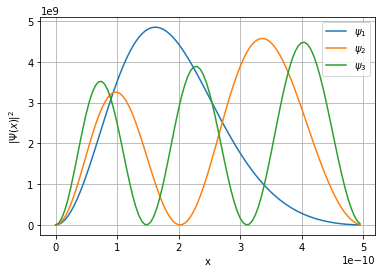

In [269]:
L=5e-10
x=np.arange(0,L,L/100)
y1=(psi(100,1,x)**2)
y2=(psi(100,2,x))**2
y3=(psi(100,3,x)**2)

plot(x,y1,label='$\psi_1$')

plot(x,y2,label='$\psi_2$')
plot(x,y3,label='$\psi_3$')
xlabel('x')
ylabel("$|\Psi(x)|^2$")
legend()
grid()

In [275]:
print(integrate.simps(psi(100,3,x)**2,x),
integrate.simps(psi(100,2,x)**2,x),integrate.simps(psi(100,1,x)**2,x))



0.9999815892554891 0.9999981923926964 1.000005007903151


They are all normalised.

## 2

$$-5\frac{\partial^2 u}{\partial t^2} + \frac{\partial }{\partial x}[2(x^2-x)\frac{\partial u}{\partial x}] -20u=0; x \in (0,1)$$
The time-independent operator can be expressed as:
$$\hat{L}_x=(2x^2-x)\frac{d^2}{dx^2}+(4x-1)\frac{d}{dx} -20$$

$$\hat{L}_x u=5\frac{\partial^2 u}{\partial t^2}$$
Writing the general solution in form of seperable solutions:
$$u(x)=\sum_k w(x)_kv_k(t)$$
where $v(t)=a_k \cos(\omega_k t )+b_k\sin(\omega_k t)$
$$\sum_k v_k(t)\hat{L}_x( w_k(x))=\sum_k 5w_k(x)\frac{d^2 v_k(t)}{d t^2}$$
expessing at t=0:
$$u(x,0)=\sum_k a_k w_k(x)$$
Then,
$$\sum_k \hat{L}_x(w_k(x))=-5 \sum_k \omega_k^2 w_k(x)$$

using central difference, where $P(x)=2(x^2-x)$:
$$\textbf{L}_{nn}=\frac{P((n+\frac{1}{2})h)+P((n-\frac{1}{2})h)+20h^2}{5}$$
$$\textbf{L}_{nn+1}=-\frac{P((n+\frac{1}{2})h)}{5}$$
$$\textbf{L}_{n+1n}=-\frac{P((n+\frac{1}{2})h)}{5}$$


In [318]:
def P(x):
    return(2*(x*x-x))

In [673]:
def L(N):#returns(N-1,N-1)array
    h=1/N
    A=np.zeros([N-1,N-1],float)
    for i in range(1,N-2):
        A[i,i]=(P(((i+1)+1/2)*h)+P(((i+1)-1/2)*h)+20*h*h)/5
        A[i+1,i]=A[i,i+1]=-P(((i+1)+1/2)*h)/5
    A[0,0]=A[N-2,N-2]=(P(((1)+1/2)*h)+P(((1)-1/2)*h)+20*h*h)/5
    A[0,1]=A[1,0]=-P(((1)+1/2)*h)/5
    A/=h*h  
    return(-A)   

In [674]:
L(200)

array([[ 155. , -119.1,   -0. , ...,   -0. ,   -0. ,   -0. ],
       [-119.1,  312.6, -197.5, ...,   -0. ,   -0. ,   -0. ],
       [  -0. , -197.5,  468.6, ...,   -0. ,   -0. ,   -0. ],
       ...,
       [  -0. ,   -0. ,   -0. , ...,  468.6, -197.5,   -0. ],
       [  -0. ,   -0. ,   -0. , ..., -197.5,  312.6, -119.1],
       [  -0. ,   -0. ,   -0. , ...,   -0. , -119.1,  155. ]])

In [675]:
om2,w=np.linalg.eig(L(200))
isort = np.argsort(om2)
om2=om2[isort]
w=w[:,isort]


In [676]:
om=np.sqrt(abs(om2))
print(om[:30])

[ 1.96261683  1.64501942  0.81928883  1.49596337  2.45216683  3.26317133
  4.01722179  4.74103673  5.44622582  6.13880133  6.82223176  7.49867372
  8.16954625  8.83582736  9.49821938 10.1572467  10.81331632 11.46675665
 12.11784293 12.76681395 13.41388314 14.05924548 14.7030817  15.34556047
 15.98683933 16.62706472 17.26637168 17.90488341 18.5427109  19.17995283]


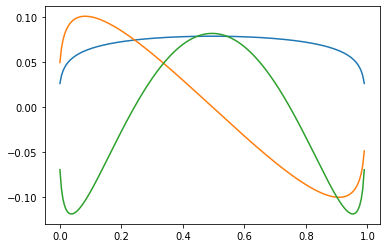

In [677]:
x=np.arange(0,199)*1/200
for i in np.arange(3):
    plot(x,w[:,i])



In [678]:
def init(x):
    if x>=0 and x<=0.5:
        return(x) 
    if x>=0.5 and x<=1:
        return(-x+1)
    
    else:
        return(0)

In [679]:

k=[]
for i in np.arange(0,1,1/199):
    k.append(init(i))

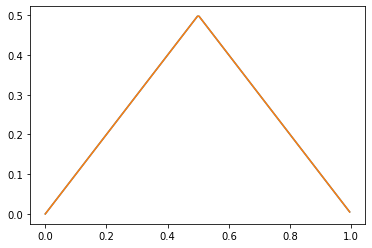

In [680]:
x=np.arange(0,1,1/199)
winv=np.linalg.inv(w)
ak=winv.dot(k)

plot(x,k)
plot(x,w.dot(ak))

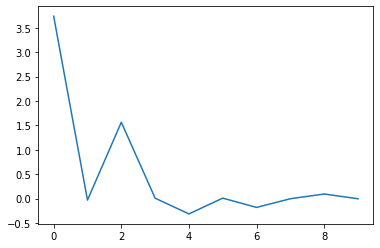

In [681]:
plot(ak[:10])

In [682]:
from matplotlib import animation
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from IPython.display import HTML

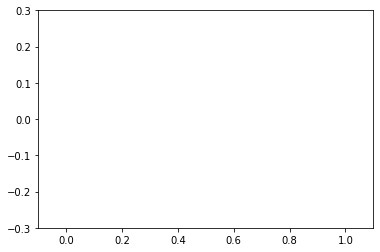

In [683]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.1, 1.1))
ax.set_ylim((- 0.3, 0.3))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

In [684]:
def frame(i):
        period =  2. * np.pi / om[0]
        t = np.float64(i) / np.float64(nframes) * period * 4
        coeffs = ak * np.cos(om * t)
        y = w.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [685]:

anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nframes, interval=40, blit=True,
                               repeat_delay=2000)

HTML(anim.to_html5_video())